### short intrusion timeseries for figure

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc
rc('font', **{'size':30})
#rc('text', usetex=True)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:

inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah1p0e+02'
outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02'
'''
folder = '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/'
inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_SILLsigmah2p5e+01'
outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01'

inputfolder = '/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah5p0e+01'
outfolder = '//g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01'
'''

In [5]:
print(inputfolder)

/g/data/v45/qo9901/4layer_input/layer4_tau1p0e-01_fresh_canyon_nDSW_STEEPSILLsigmah5p0e+01


In [6]:
if not os.path.exists(outfolder):
    os.makedirs(outfolder)
    
print("Output graphs will be saved in folder: "+outfolder)

Output graphs will be saved in folder: //g/data/v45/qo9901/fig_MOM6_3layer/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig5p0e+01


In [7]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42243 instead
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/contextlib.py:126: UserWarning: Creating scratch directories is taking a surprisingly long time. (2.60s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42243/status,
Dashboard: /proxy/42243/status,Workers: 1
Total threads: 1,Total memory: 50.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44673,Workers: 1
Dashboard: /proxy/42243/status,Total threads: 1
Started: Just now,Total memory: 50.00 GiB
Comm: tcp://127.0.0.1:36721,Total threads: 1
Dashboard: /proxy/36743/status,Memory: 50.00 GiB
Nanny: tcp://127.0.0.1:37685,


In [8]:
from matplotlib import ticker, cm

In [18]:
%%time
# for reviews gaussian 20km
FileList = [folder + 'output' + '{0:03}'.format(i) + '/prog_chunked.nc' for i in range(50,100)] #20,70 for original wide, 51,71 for wide steep

print(FileList)
dsx_prog_daily = xr.open_mfdataset(FileList, combine='by_coords', chunks={"Time": 20}, decode_times=False, preprocess = lambda d: d[['e', 'h', 'uh','vh']], engine='netcdf4', parallel=True)
dsx_prog_daily.coords['Time'] = dsx_prog_daily.coords['Time']/(365)
## defining ASCintrusion
intrusions = dsx_prog_daily.vh.isel(zl = 2).sel(yq = -100, method = "nearest").sum(dim = 'xh')

['/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output050/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output051/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output052/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output053/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output054/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output055/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output056/prog_chunked.nc', '/g/data/hh5/tmp/qo9901_JPOlayeredASC/4layer_fresh_tau1p0e-01_newtopo_canyonSILL_nDSW_sig2p5e+01/output057/prog_chunked.nc',

In [8]:
### if reading in files

In [10]:
strength_arr = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_strength.nc').uh.sel(Time = slice(51,71))
intrusions_arr = xr.open_mfdataset('4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02_intrusion.nc').vh.sel(Time = slice(51,71))


In [11]:
strength_arr

<xarray.DataArray 'uh' (Time: 18250)>
dask.array<open_dataset-uh, shape=(18250,), dtype=float32, chunksize=(18250,), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 30.0 30.0 30.01 30.01 ... 79.99 79.99 80.0 80.0

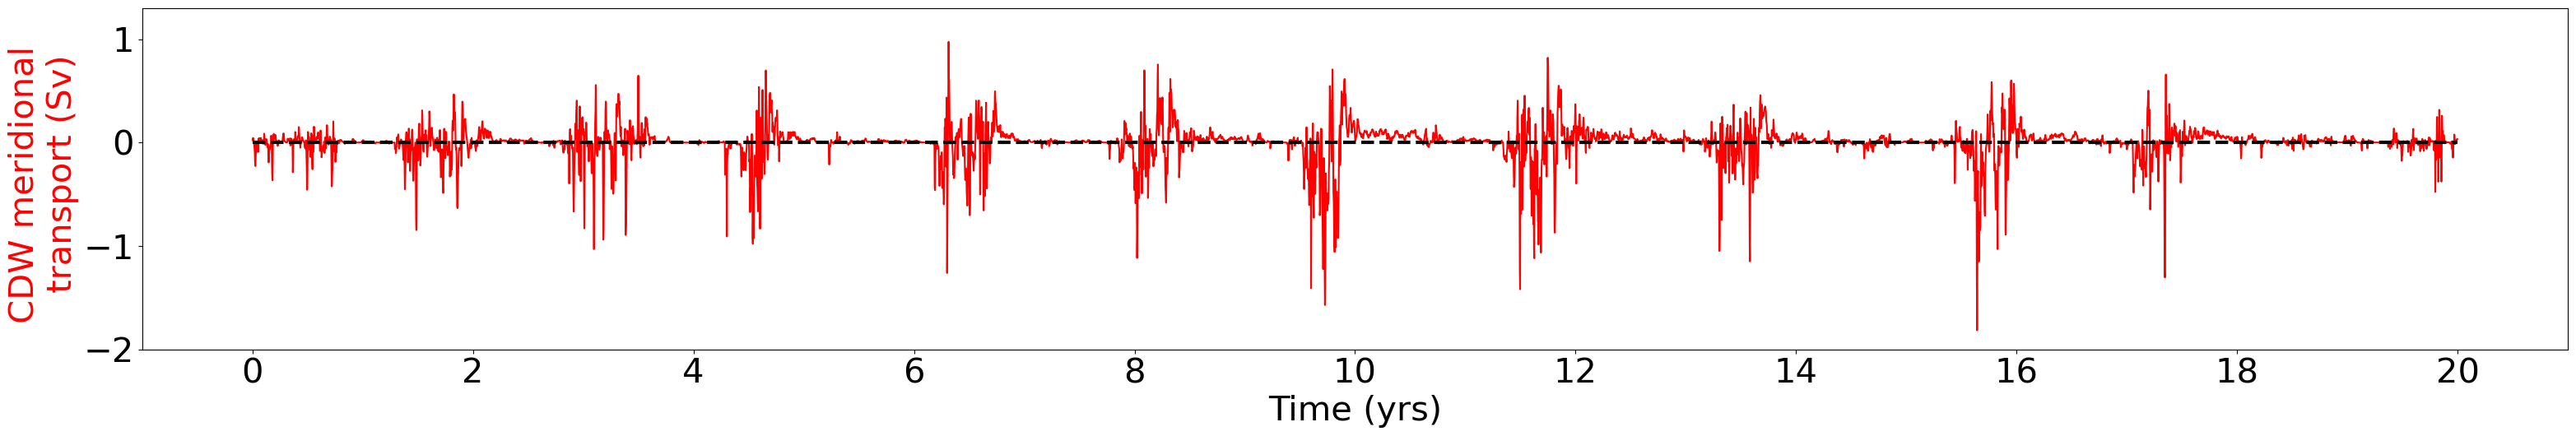

In [23]:
plt.figure(figsize = (32,6))
ax1 = plt.subplot()

(intrusions_arr.sel(Time = slice(51,71))/1e6).plot(ax = ax1, color = 'r', label = 'CDW meridional transport (Sv)')
plt.plot(np.arange(51,72,1),np.zeros(len(np.arange(51,72,1))), linestyle = 'dashed', color = 'k', lw = 3)
ax1.set_ylabel('CDW meridional \n transport (Sv)', color = 'r')
ax1.set_ylim([-2,1.3])

ax1.set_xticks(range(51,72,2))
ax1.set_xticklabels(range(0,21,2))
#ax1.set_xticklabels(list(np.around(np.arange(0,2.1,0.2),1)))
ax1.set_title('')
#|ax2.set_title('')

ax1.set_xlabel('Time (yrs)')
plt.tight_layout()
#plt.savefig(outfolder + '/CDWtimeseriesshort.png', dpi = 600)
#plt.savefig(outfolder + '/ASC_strength_timeseries_extend.pdf')